In [49]:
from sklearn.impute import SimpleImputer, KNNImputer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# full KNN

filter out proteins with too few cell lines

In [32]:
protein_median = pd.read_csv(
    "../data/protein/E0022_P06_Protein_Matrix_Median_no_control.txt",
    sep='\t',
    index_col=0)
protein_RUV = pd.read_csv(
    "../data/protein/E0022_P06_Protein_Matrix_ProNorM_no_control.txt",
    sep='\t',
    index_col=0)

In [14]:
protein_median_na_count = pd.isna(protein_median).sum()[1:]

protein_median = protein_median[protein_median_na_count[protein_median_na_count<=950].index]

protein_median.to_csv("../data/protein/E0022_P06_Protein_Matrix_Median_no_control_min950.txt", sep='\t')

In [40]:
protein_RUV_na_count = pd.isna(protein_RUV).sum()

# protein_RUV = protein_RUV[protein_RUV_na_count[protein_RUV_na_count<=950].index]

# protein_RUV.to_csv("../data/protein/E0022_P06_Protein_Matrix_ProNorM_no_control_min950.txt", sep='\t')

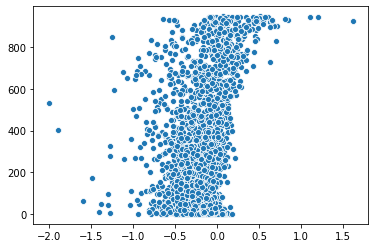

In [27]:
sns.scatterplot(protein_median.mean(axis=0), protein_median_na_count)

Text(0.5, 1.0, 'intensity vs missing value')

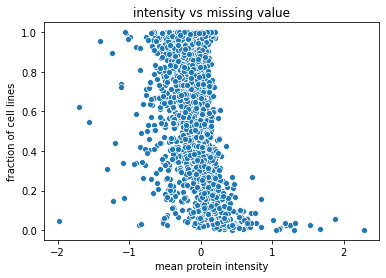

In [52]:
sns.scatterplot(protein_RUV.mean(axis=0), (1-protein_RUV_na_count/protein_RUV.shape[0]))
plt.xlabel("mean protein intensity")
plt.ylabel('fraction of cell lines')
plt.title('intensity vs missing value')

In [58]:
protein_RUV.mean(axis=0)[protein_RUV.mean(axis=0)>1.7]

GPA33_HUMAN    1.874724
HV307_HUMAN    2.278558
dtype: float64

In [50]:
spearmanr(protein_RUV.mean(axis=0), (1-protein_RUV_na_count/protein_RUV.shape[0]))

SpearmanrResult(correlation=-0.14527218024416483, pvalue=1.2141543878054048e-17)

In [55]:
protein_RUV['HV307_HUMAN']

Cell_line
201T       NaN
22RV1      NaN
23132-87   NaN
42-MG-BA   NaN
451Lu      NaN
            ..
YT         NaN
ZR-75-30   NaN
huH-1      NaN
no-10      NaN
no-11      NaN
Name: HV307_HUMAN, Length: 979, dtype: float64